In [3]:
#import all libraries

# numpy and pandas help us load and manipulate data
import numpy as np
import pandas as pd

# matplotlib and seaborn are used to plot data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols

#sklearn has many machine learning algorithms
from sklearn.linear_model import LinearRegression

# this helps split data for modeling
from sklearn.model_selection import train_test_split

import scipy as sp
import statsmodels.stats.diagnostic as diag
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sms
import pysal as ps

import statsmodels.tsa.api as smt
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [8]:
# Load student data
student1 = pd.read_csv("../Files/student-mat.csv", sep = ';', header = 0)
student2 = pd.read_csv("../Files/student-mat.csv", sep = ';', header = 0)
students = pd.concat([student1,student2])

In [9]:
# View first few rows of data
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
# Drop protected columns
students = students.drop(['school', 'sex', 'age', 'address',], axis=1)

In [11]:
# Inspect Data
students.head()

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GT3,A,4,4,at_home,teacher,course,mother,2,2,...,4,3,4,1,1,3,6,5,6,6
1,GT3,T,1,1,at_home,other,course,father,1,2,...,5,3,3,1,1,3,4,5,5,6
2,LE3,T,1,1,at_home,other,other,mother,1,2,...,4,3,2,2,3,3,10,7,8,10
3,GT3,T,4,2,health,services,home,mother,1,3,...,3,2,2,1,1,5,2,15,14,15
4,GT3,T,3,3,other,other,home,father,1,2,...,4,3,2,1,2,5,4,6,10,10


In [12]:
# Create dummy variables for Family Size

df = pd.get_dummies(students, columns=['Pstatus','famsize','Mjob', 'Fjob', 'reason', 'guardian', 'famsup', 'paid', 'activities', 'schoolsup', 'nursery','higher','internet', 'romantic'])
df.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,schoolsup_no,schoolsup_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,4,4,2,2,0,4,3,4,1,1,...,False,True,False,True,False,True,True,False,True,False
1,1,1,1,2,0,5,3,3,1,1,...,True,False,True,False,False,True,False,True,True,False
2,1,1,1,2,3,4,3,2,2,3,...,False,True,False,True,False,True,False,True,True,False
3,4,2,1,3,0,3,2,2,1,1,...,True,False,False,True,False,True,False,True,False,True
4,3,3,1,2,0,4,3,2,1,2,...,True,False,False,True,False,True,True,False,True,False


In [13]:
# Look at highly correlated features
df.corr()[['G3']].sort_values(by='G3', ascending = False)

,G3
G3,1.000000
G2,0.904868
G1,0.801468
Medu,0.217147
higher_yes,0.182465
Fedu,0.152457
romantic_no,0.129970
Mjob_health,0.116158
paid_yes,0.101996
internet_yes,0.098483


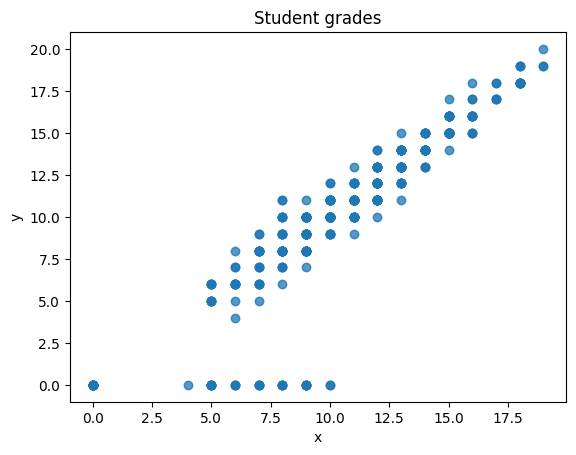

In [14]:
# Check Linearity - Section 2 Grades
X1 = df['G2']
y = df['G3']

# Plot
plt.scatter(X1,y, alpha=0.5)
plt.title('Student grades')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

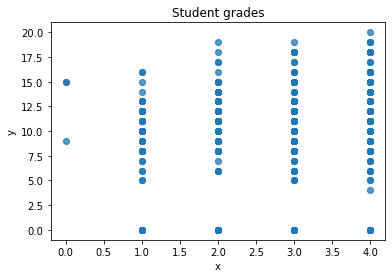

In [9]:
# Check Linearity - Mother's education
X2 = df['Medu']
y = df['G3']

# Plot
plt.scatter(X2,y, alpha=0.5)
plt.title('Student grades')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

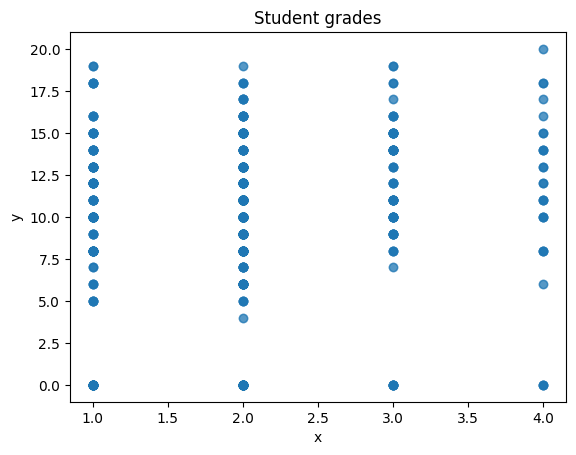

In [16]:
# Check Linearity - Study time
X2 = df['studytime']
y = df['G3']

# Plot
plt.scatter(X2,y, alpha=0.5)
plt.title('Student grades')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [18]:
# Partition features and response
X = df.iloc[:, : -1]
y = df['G3']

In [20]:
# Split into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [21]:
X.columns

Index(['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Pstatus_A', 'Pstatus_T', 'famsize_GT3', 'famsize_LE3',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes',
       'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'schoolsup_no', 'schoolsup_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no'],
      dtype='object')

In [22]:
# Adding the constant term 
  
y = df.G3  # response
X = df.G2  # predictor
X = sms.add_constant(X)  # Adds a constant term to the predictor
X.head()  

,const,G2
0,1.0,6
1,1.0,5
2,1.0,8
3,1.0,14
4,1.0,10


In [23]:
# Create Regression Object
est=sms.OLS(y, X)

In [25]:
# Fit Regression Model
# Your Code Goes Here
est = est.fit()
# Summarize regression Model
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     3560.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.68e-294
Time:                        15:05:59   Log-Likelihood:                -1647.7
No. Observations:                 790   AIC:                             3299.
Df Residuals:                     788   BIC:                             3309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3928      0.210     -6.642      0.000      -1.804      -0.981
G2             1.1021      0.018     59.670      0.000       1.066       1.138
==============================================================================
Omnibus:                      470.923   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3553.241
Skew:                          -2.699   Prob(JB):                         0.00
Kurtosis:                      11.877   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# perform Durbin-Watson test

durbin_watson(est.resid)

1.866424091572559

In [28]:
# Breusch-Pagan - Check for Multicolinearity
names = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Pstatus_A', 'Pstatus_T', 'famsize_GT3', 'famsize_LE3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'schoolsup_no', 'schoolsup_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']
test = diag.het_breuschpagan(est.resid, est.model.exog)

lzip(names, test)

[('Medu', 30.020288342735117),
 ('Fedu', 4.2754949531916675e-08),
 ('traveltime', 31.12712991046749),
 ('studytime', 3.323606825659562e-08)]

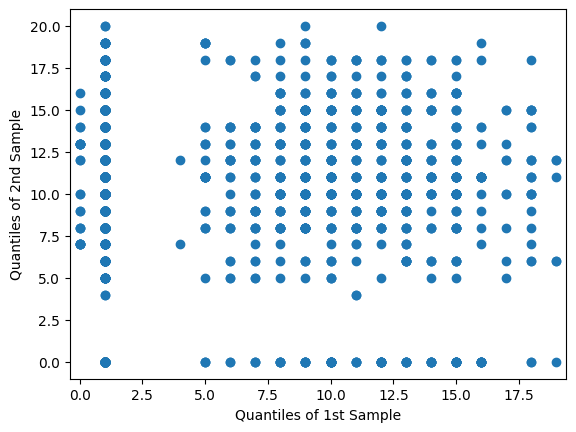

In [29]:
# Create QQ plot

from statsmodels.graphics.gofplots import qqplot_2samples
pp_x = sms.ProbPlot(X)
pp_y = sms.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
plt.show()

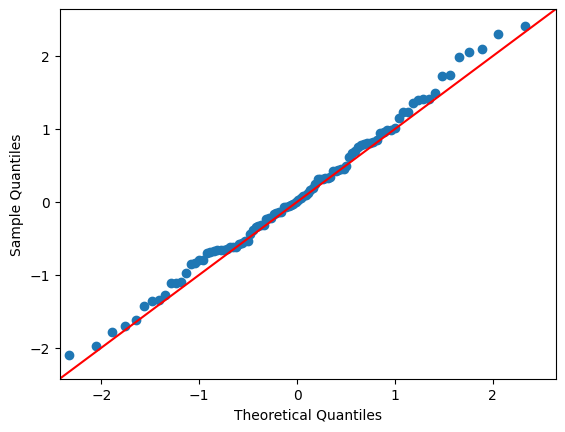

In [35]:
# Random data points generated 
data_points = np.random.normal(0, 1, 100)     
  
# Plot new QQ
sms.qqplot(data_points, line ='45') 
plt.show() 